# Overview:

## Broadband Sensitivity Calculations:
1. Import Excel Spreadsheet.py
2. Call calcByAngle and store in a variable to create a function from observation zenith angle to various outputs
3. Call created function with requested angle from zenith. *This is 90 - elevation angle*
4. Create output display functions if necessary
5. Call requested results

[15.31558919 32.14382916 37.4087667  45.67807302 58.64076942]
beam:  [15.31558919 32.14382916 37.4087667  45.67807302 58.64076942]
N_tubes: [('HF1', 1), ('HF2', 1), ('HF3', 1), ('HF4', 1), ('HF5', 1)]
N_tels: 1
data_C: [2.40884273e+14 4.26633257e+08 4.79895258e+07 2.64321605e+06
 2.40186068e+05]
tube_count: 1
N_tels: 1
tube_noise [161259.40741016      0.              0.              0.
      0.        ]
tube_count: 1
N_tels: 1
tube_noise [  0.         148.29136854   0.           0.           0.        ]
tube_count: 1
N_tels: 1
tube_noise [ 0.          0.         51.27263549  0.          0.        ]
tube_count: 1
N_tels: 1
tube_noise [ 0.          0.          0.         10.96098351  0.        ]
tube_count: 1
N_tels: 1
tube_noise [0.         0.         0.         0.         6.18918171]


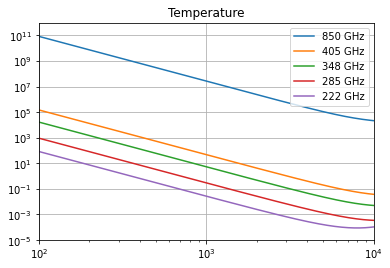

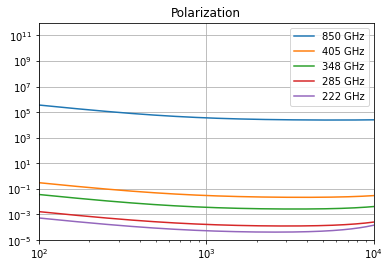

In [4]:
import sensitivity_calculator as sens
import numpy as np
import matplotlib.pyplot as plt

inputs = {'diameter': 5.7, 't': 273, 'wfe': 10.7, 'eta': 0.98, 'doe': 0.8, 't_int': 1, 'pixelYield': 0.8, 
        'szCamNumPoln': 1, 'eorSpecNumPoln': 2, 't_filter_cold': np.array([0.593, 0.84 , 0.909, 0.922, 0.89 ]), 
        't_lens_cold': np.array([0.98, 0.98, 0.98, 0.98, 0.98]), 
        't_uhdpe_window': np.array([0.96, 0.97, 0.97, 0.97, 0.97]), 
        'singleModedAOmegaLambda2': np.array([1., 1., 1., 1., 1.]), 
        'spatialPixels': np.array([36450, 20808, 10368, 10368,  7938]), 
        'eqbw': np.array([9.7e+10, 3.0e+10, 3.6e+10, 7.0e+10, 5.6e+10]), 
        'centerFrequency': np.array([8.50e+11, 4.05e+11, 3.48e+11, 2.85e+11, 2.22e+11]), 'detectorNEP': 0, 
        'backgroundSubtractionDegradationFactor': 1, 'r': np.array([[100., 100., 100.],
                                            [100., 100., 100.],
                                            [100., 100., 100.],
                                            [100., 100., 100.],
                                            [100., 100., 100.]]), 
        'decimalPlaces': 3, 'observationElevationAngle': 45, 'outputFreq': True, 
        'detectorSpacing': np.array([1.51, 1.97, 2.75, 2.75, 3.13]), 'lyotStopAngle': 13.4}
# Alternatively, sens.getInputs("input.yaml")

spillEfficiency = sens.getSpillEfficiency(inputs)
calculate = sens.calcByAngle(inputs["diameter"], inputs["t"], inputs["wfe"], inputs["eta"], inputs["doe"], inputs["t_int"], inputs["pixelYield"], inputs["szCamNumPoln"], inputs["eorSpecNumPoln"],
                            inputs["t_filter_cold"], inputs["t_lens_cold"], inputs["t_uhdpe_window"], spillEfficiency, inputs["singleModedAOmegaLambda2"],
                            inputs["spatialPixels"], inputs["eqbw"], inputs["centerFrequency"], inputs["detectorNEP"],
                            inputs["backgroundSubtractionDegradationFactor"], inputs["r"])
outputs = calculate(45)

print("beam: ", outputs["beam"])

ell, N_ell_T_full, N_ell_P_full = sens.getNoiseCurves(inputs, outputs)

for curves, labels, title in zip([N_ell_T_full, N_ell_P_full], [inputs["centerFrequency"]] * 2, ["Temperature", "Polarization"]):
    for curve, label in zip(curves, labels):
        plt.plot(ell, curve, label=str(int(label/1e9))+' GHz')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(10**2, 10**4)
    plt.ylim(10**-5, 10**12)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

## EoR Calculations
1. Import sensitivity calculator
2. Create dictonary of parameters specifying detector
3. Create list of pairs of finesse and frequency values to get noise curves for
4. Call sens.eorNoiseCurves
5. Index specific noise curve from returned dictonary

In [3]:
inputs = {'diameter': 5.7, 't': 273, 'wfe': 10.7, 'eta': 0.98, 'doe': 0.8, 'pixelYield': 0.8,
              'eorSpecNumPoln': 2, 't_filter_cold': np.array([1, 1]), 't_lens_cold': np.array([.98, .98]), 't_uhdpe_window': np.array([1, 1]), 'spatialPixels': np.array([3456, 3072]),
              'centerFrequency': np.array([262.5*10**9, 367.5*10**9]), 'detectorNEP': 0,
              'backgroundSubtractionDegradationFactor': 1, 'observationElevationAngle': 45, 'detectorSpacing': np.array([2.75, 2.09]), 'lyotStopAngle': 13.4}
# diameter is the diameter of the telescope in m
# t is the temperature of the telescope in K
# wfe is wave front error in um
# eta is telescope efficiency
# doe is detector quantum efficiency; loss due to superconducting detectors
# pixelYield is the proportion of working pixels
# eorSpecNumPoln is the number of polarization modes for EoR spectrometers
# t_filter_cold, t_lens_cold, and t_uhdpe_window all characterize the throughput of the instruments. However, we don't have experimental values for these yet, so they currently are an estimation.
# spatialPixels is the total number of pixels on all arrays
# centerFrequency is the center of the frequency range for the detector arrays
# detectorNEP is the NEP from the detector itself
# backgroundSubtractionDegradationFactor is an efficiency loss factor from post analysis removing of common atmospheric noise
# observationElevationAngle is the angle above the horizon that the telescope is observing
# detectorSpacing is the distance between pixels in the arrays in mm
# lyotStopAngle is the angle from the detectors to the lyot stop, which controls the spill efficiency

rfpairs = np.array([(100, 250*10**9), (150, 350*10**9), (1000, 400*10**9)])
# rfpairs is a list of (resolving power, center frequency) to get noise curves for
# Note that center frequency is in Hz

allCurves = sens.eorNoiseCurves(inputs, rfpairs)
ell_250, N_ell_T_full_250, N_ell_P_full_250 = allCurves[(100, 250*10**9)]
ell_400, N_ell_T_full_400, N_ell_P_full_400 = allCurves[(1000, 400*10**9)]

N_tubes: [('HF1', 1), ('HF2', 1)]
N_tels: 1
data_C: [422385.69775134             nan]
tube_count: 1
N_tels: 1
tube_noise [170.15483506   0.        ]
tube_count: 1
N_tels: 1
tube_noise [ 0. nan]
N_tubes: [('HF1', 1), ('HF2', 1)]
N_tels: 1
data_C: [              nan 39793337.45286738]
tube_count: 1
N_tels: 1
tube_noise [nan  0.]
tube_count: 1
N_tels: 1
tube_noise [  0.         605.10385865]
N_tubes: [('HF1', 1), ('HF2', 1)]
N_tels: 1
data_C: [           nan 3.49663277e+08]
tube_count: 1
N_tels: 1
tube_noise [nan  0.]
tube_count: 1
N_tels: 1
tube_noise [   0.         6070.84307847]


## Map Simulations
1. Run broadband calculations.
2. Call ccat_mapsims with input parameters, output from broadband calculations, band and tube of detector, pysm components (if wanted), seed (if wanted), whether to simulate the cmb, and whether to simulate noise.
3. Feed to healpy's anafast to analyze the power spectrum.

zf: 0.3755340576171875
N_tubes: [('HF1', 1), ('HF2', 1), ('HF3', 1), ('HF4', 1), ('HF5', 1)]
N_tels: 1
data_C: [2.40884273e+14 4.26633257e+08 4.79895258e+07 2.64321605e+06
 2.40186068e+05]
tube_count: 1
N_tels: 1
tube_noise [161259.40741016      0.              0.              0.
      0.        ]
tube_count: 1
N_tels: 1
tube_noise [  0.         148.29136854   0.           0.           0.        ]
tube_count: 1
N_tels: 1
tube_noise [ 0.          0.         51.27263549  0.          0.        ]
tube_count: 1
N_tels: 1
tube_noise [ 0.          0.          0.         10.96098351  0.        ]
tube_count: 1
N_tels: 1
tube_noise [0.         0.         0.         0.         6.18918171]
instrument_parameters: /home/amm487/cloned_repos/Sensitivity-Calculator/src/sensitivity_calculator/data/instrument_parameters/instrument_parameters.tbl
filter: all
noise instrument parameters:  simonsobs_instrument_parameters_2020.06
noise channels_list:  [Channel LT0_UHF1, Channel LT0_UHF2, Channel LT1_UHF1, Ch

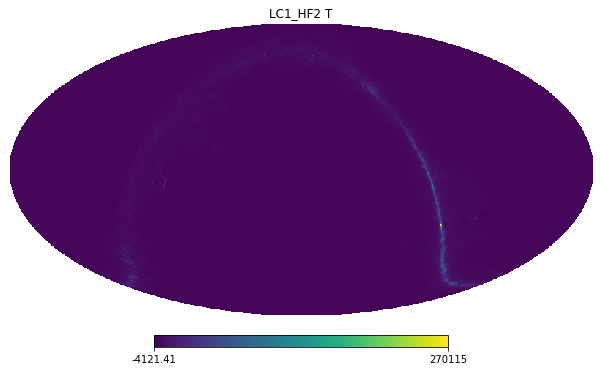

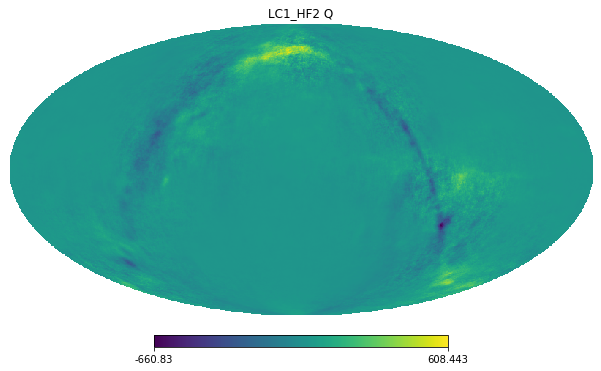

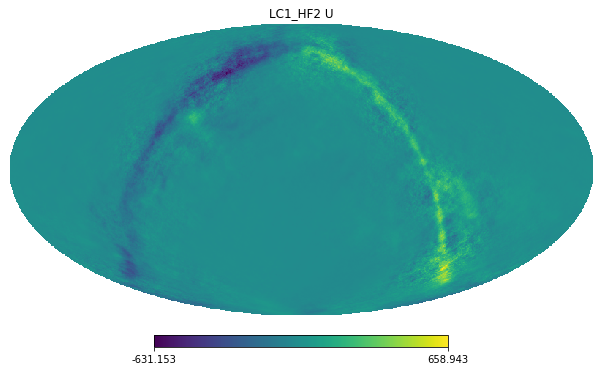

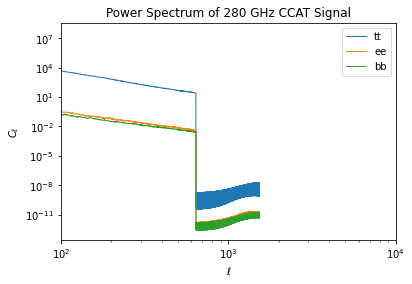

instrument_parameters: /home/amm487/anaconda3/lib/python3.9/site-packages/mapsims/data/simonsobs_instrument_parameters_2020.06/simonsobs_instrument_parameters_2020.06.tbl
filter: all
noise instrument parameters:  simonsobs_instrument_parameters_2020.06
noise channels_list:  [Channel LT0_UHF1, Channel LT0_UHF2, Channel LT1_UHF1, Channel LT1_UHF2, Channel LT2_MFF1, Channel LT2_MFF2, Channel LT3_MFF1, Channel LT3_MFF2, Channel LT4_MFS1, Channel LT4_MFS2, Channel LT5_MFS1, Channel LT5_MFS2, Channel LT6_LF1, Channel LT6_LF2, Channel ST0_UHF1, Channel ST0_UHF2, Channel ST1_MFF1, Channel ST1_MFF2, Channel ST2_MFS1, Channel ST2_MFS2, Channel ST3_LF1, Channel ST3_LF2]
noise channels:  {'LT0_UHF1': Channel LT0_UHF1, 'LT0_UHF2': Channel LT0_UHF2, 'LT1_UHF1': Channel LT1_UHF1, 'LT1_UHF2': Channel LT1_UHF2, 'LT2_MFF1': Channel LT2_MFF1, 'LT2_MFF2': Channel LT2_MFF2, 'LT3_MFF1': Channel LT3_MFF1, 'LT3_MFF2': Channel LT3_MFF2, 'LT4_MFS1': Channel LT4_MFS1, 'LT4_MFS2': Channel LT4_MFS2, 'LT5_MFS1': Ch

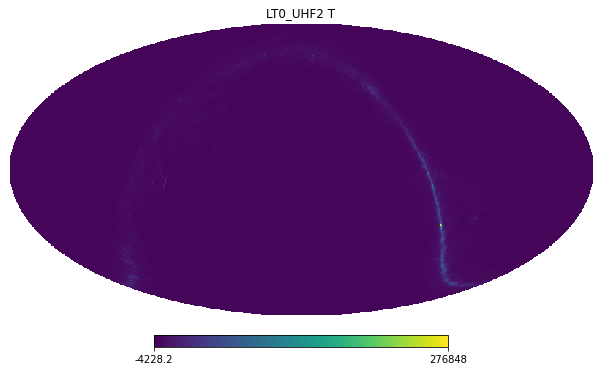

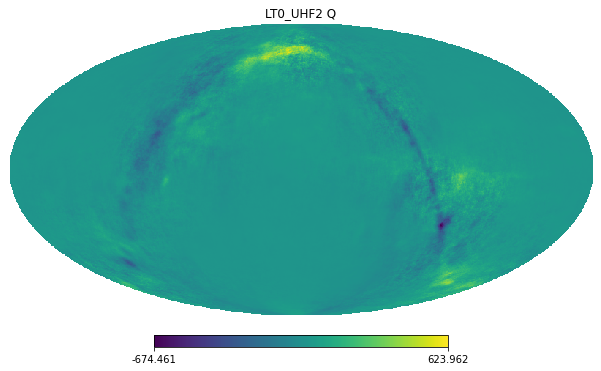

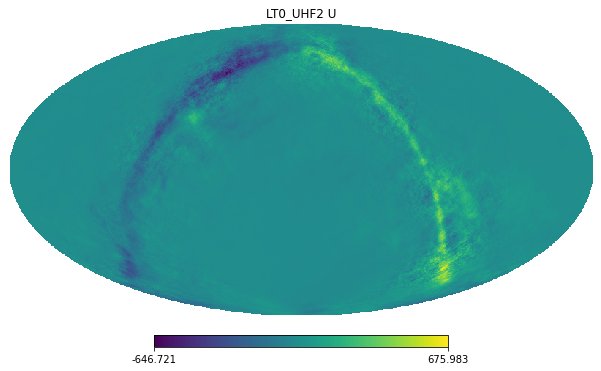

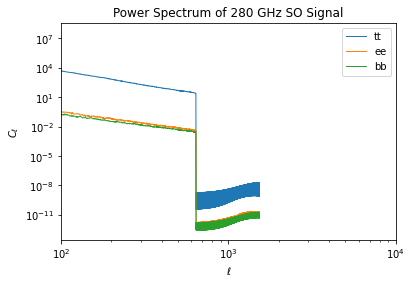

N_tubes: [('HF1', 1), ('HF2', 1), ('HF3', 1), ('HF4', 1), ('HF5', 1)]
N_tels: 1
data_C: [2.40884273e+14 4.26633257e+08 4.79895258e+07 2.64321605e+06
 2.40186068e+05]
tube_count: 1
N_tels: 1
tube_noise [161259.40741016      0.              0.              0.
      0.        ]
tube_count: 1
N_tels: 1
tube_noise [  0.         148.29136854   0.           0.           0.        ]
tube_count: 1
N_tels: 1
tube_noise [ 0.          0.         51.27263549  0.          0.        ]
tube_count: 1
N_tels: 1
tube_noise [ 0.          0.          0.         10.96098351  0.        ]
tube_count: 1
N_tels: 1
tube_noise [0.         0.         0.         0.         6.18918171]
instrument_parameters: /home/amm487/cloned_repos/Sensitivity-Calculator/src/sensitivity_calculator/data/instrument_parameters/instrument_parameters.tbl
filter: all
noise instrument parameters:  simonsobs_instrument_parameters_2020.06
noise channels_list:  [Channel LT0_UHF1, Channel LT0_UHF2, Channel LT1_UHF1, Channel LT1_UHF2, Channel

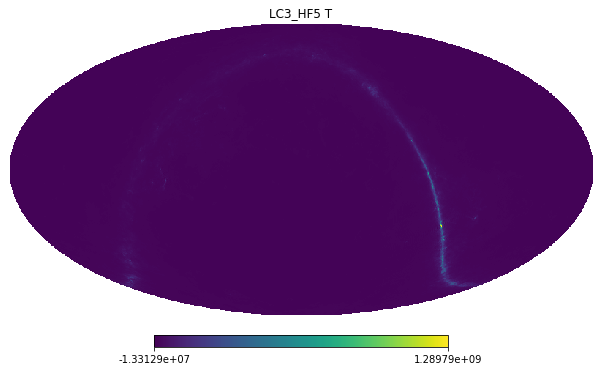

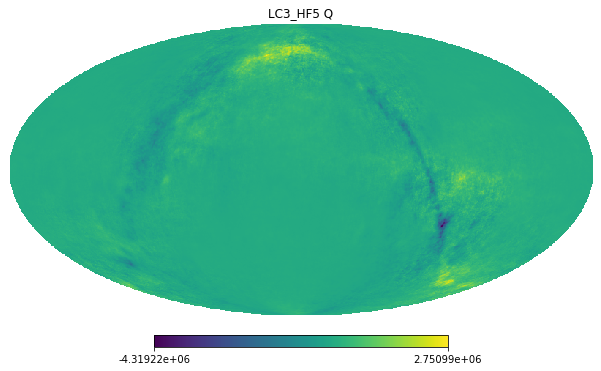

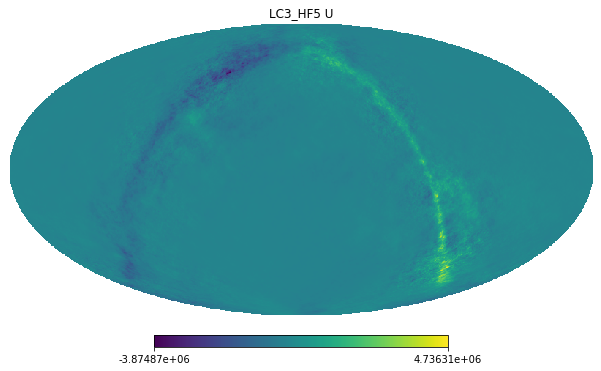

LC3_HF6
skipped: LC3_HF6


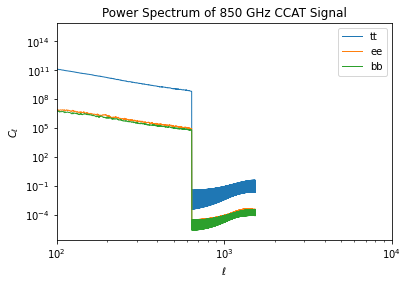

N_tubes: [('HF1', 1), ('HF2', 1), ('HF3', 1), ('HF4', 1), ('HF5', 1)]
N_tels: 1
data_C: [2.40884273e+14 4.26633257e+08 4.79895258e+07 2.64321605e+06
 2.40186068e+05]
tube_count: 1
N_tels: 1
tube_noise [161259.40741016      0.              0.              0.
      0.        ]
tube_count: 1
N_tels: 1
tube_noise [  0.         148.29136854   0.           0.           0.        ]
tube_count: 1
N_tels: 1
tube_noise [ 0.          0.         51.27263549  0.          0.        ]
tube_count: 1
N_tels: 1
tube_noise [ 0.          0.          0.         10.96098351  0.        ]
tube_count: 1
N_tels: 1
tube_noise [0.         0.         0.         0.         6.18918171]
instrument_parameters: /home/amm487/cloned_repos/Sensitivity-Calculator/src/sensitivity_calculator/data/instrument_parameters/instrument_parameters.tbl
filter: all
noise instrument parameters:  simonsobs_instrument_parameters_2020.06
noise channels_list:  [Channel LT0_UHF1, Channel LT0_UHF2, Channel LT1_UHF1, Channel LT1_UHF2, Channel

nhitmaps:  (2, 3145728)
output hitmaps:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
only (?) hitmap:  [0. 0. 0. ... 0. 0. 0.]
hitmap max:  1.0
[0. 0. 0. ... 0. 0. 0.]
imap.ndim:  1
[0. 0. 0. ... 0. 0. 0.]
imap.ndim:  1
telescope: LA
survey: <sensitivity_calculator.noise.CCAT object at 0x7f00fb0b09a0>
parameters of get_noise_curves: (f_sky, ell_max, delta_ell, deconv_beam=True, full_covar=False, rolloff_ell=None)
det: LC1_HF1
det: LC1_HF2
LC1_HF1
skipped: LC1_HF1
LC1_HF2


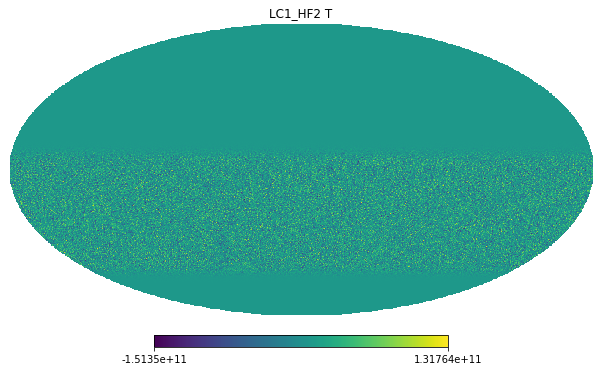

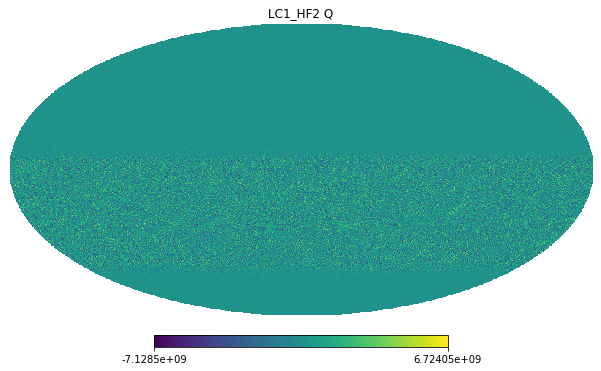

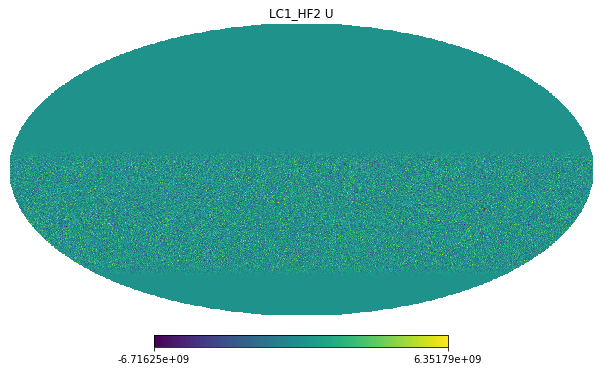

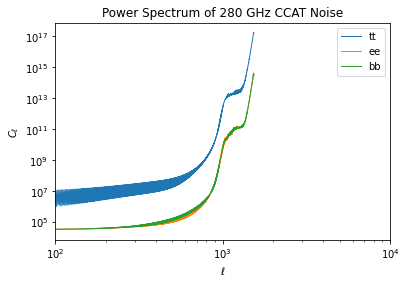

instrument_parameters: /home/amm487/anaconda3/lib/python3.9/site-packages/mapsims/data/simonsobs_instrument_parameters_2020.06/simonsobs_instrument_parameters_2020.06.tbl
filter: all
noise instrument parameters:  simonsobs_instrument_parameters_2020.06
noise channels_list:  [Channel LT0_UHF1, Channel LT0_UHF2, Channel LT1_UHF1, Channel LT1_UHF2, Channel LT2_MFF1, Channel LT2_MFF2, Channel LT3_MFF1, Channel LT3_MFF2, Channel LT4_MFS1, Channel LT4_MFS2, Channel LT5_MFS1, Channel LT5_MFS2, Channel LT6_LF1, Channel LT6_LF2, Channel ST0_UHF1, Channel ST0_UHF2, Channel ST1_MFF1, Channel ST1_MFF2, Channel ST2_MFS1, Channel ST2_MFS2, Channel ST3_LF1, Channel ST3_LF2]
noise channels:  {'LT0_UHF1': Channel LT0_UHF1, 'LT0_UHF2': Channel LT0_UHF2, 'LT1_UHF1': Channel LT1_UHF1, 'LT1_UHF2': Channel LT1_UHF2, 'LT2_MFF1': Channel LT2_MFF1, 'LT2_MFF2': Channel LT2_MFF2, 'LT3_MFF1': Channel LT3_MFF1, 'LT3_MFF2': Channel LT3_MFF2, 'LT4_MFS1': Channel LT4_MFS1, 'LT4_MFS2': Channel LT4_MFS2, 'LT5_MFS1': Ch

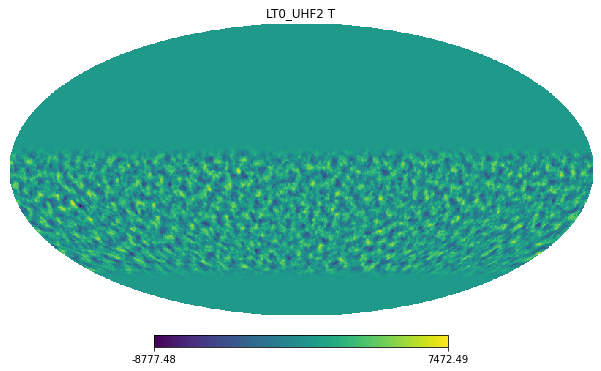

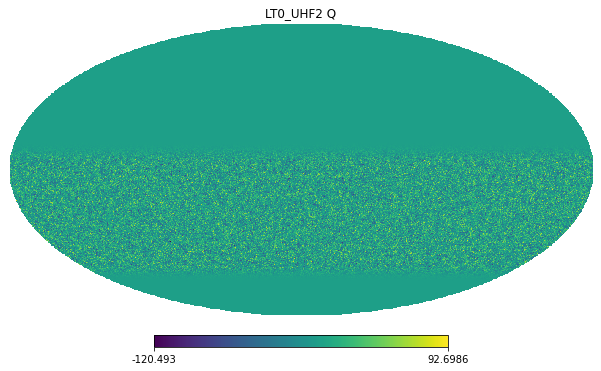

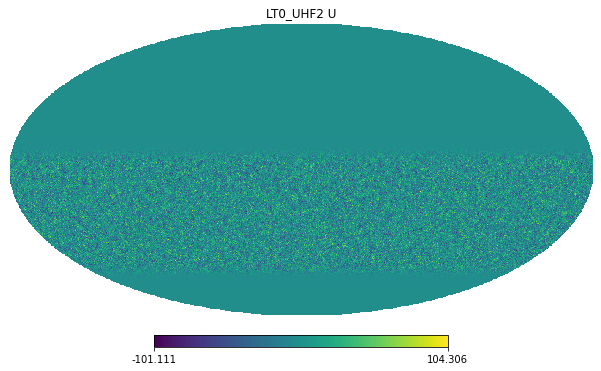

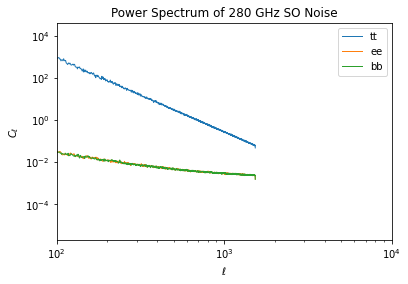

N_tubes: [('HF1', 1), ('HF2', 1), ('HF3', 1), ('HF4', 1), ('HF5', 1)]
N_tels: 1
data_C: [2.40884273e+14 4.26633257e+08 4.79895258e+07 2.64321605e+06
 2.40186068e+05]
tube_count: 1
N_tels: 1
tube_noise [161259.40741016      0.              0.              0.
      0.        ]
tube_count: 1
N_tels: 1
tube_noise [  0.         148.29136854   0.           0.           0.        ]
tube_count: 1
N_tels: 1
tube_noise [ 0.          0.         51.27263549  0.          0.        ]
tube_count: 1
N_tels: 1
tube_noise [ 0.          0.          0.         10.96098351  0.        ]
tube_count: 1
N_tels: 1
tube_noise [0.         0.         0.         0.         6.18918171]
instrument_parameters: /home/amm487/cloned_repos/Sensitivity-Calculator/src/sensitivity_calculator/data/instrument_parameters/instrument_parameters.tbl
filter: all
noise instrument parameters:  simonsobs_instrument_parameters_2020.06
noise channels_list:  [Channel LT0_UHF1, Channel LT0_UHF2, Channel LT1_UHF1, Channel LT1_UHF2, Channel

nhitmaps:  (2, 3145728)
output hitmaps:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
only (?) hitmap:  [0. 0. 0. ... 0. 0. 0.]
hitmap max:  1.0
[0. 0. 0. ... 0. 0. 0.]
imap.ndim:  1
[0. 0. 0. ... 0. 0. 0.]
imap.ndim:  1
telescope: LA
survey: <sensitivity_calculator.noise.CCAT object at 0x7f0113cb9040>
parameters of get_noise_curves: (f_sky, ell_max, delta_ell, deconv_beam=True, full_covar=False, rolloff_ell=None)
det: LC3_HF5
det: LC3_HF6
LC3_HF5


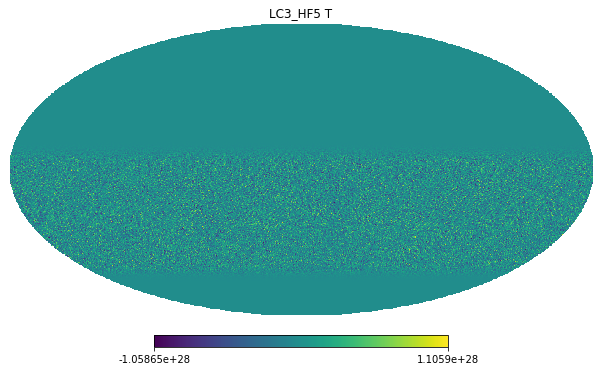

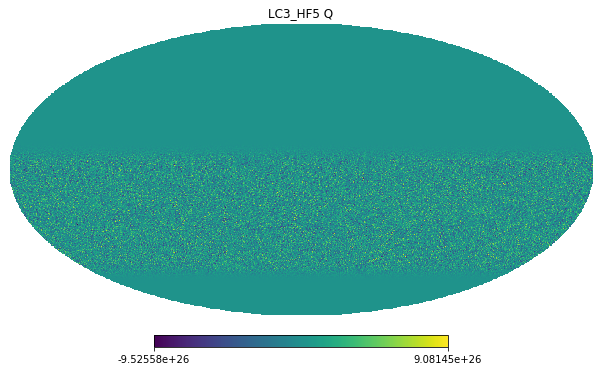

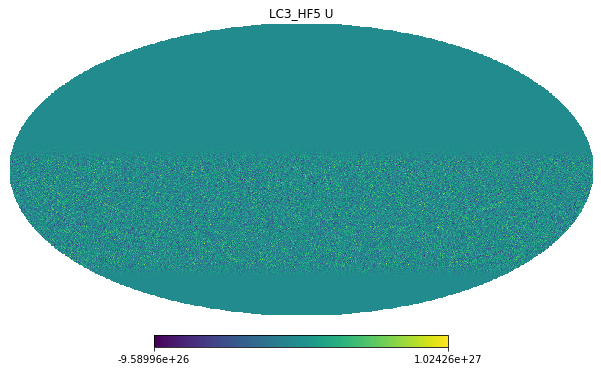

LC3_HF6
skipped: LC3_HF6


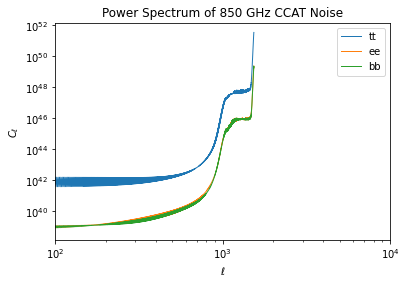

In [7]:
import healpy as hp

seed = 0
NSIDE = 512
hitmap_path = "/home/amm487/cloned_repos/Sensitivity-Calculator/src/sensitivity_calculator/ccat_uniform_coverage_nside" + str(NSIDE) + "_201021.fits"
zf = sens.zeroHitmapFraction(hitmap_path, NSIDE)
print("zf:", zf)
data_C = sens.sensitivity._data_C_calcV2(inputs)
hitmap = hp.ud_grade(
            hp.read_map(hitmap_path, dtype=np.float64),
            nside_out=NSIDE,
        )
for pysm_components, sim_noise in zip(["d2", None], [False, True]):
    ccat280 = sens.ccat_mapsims(
        inputs, outputs, "HF2", "LC1", pysm_components, seed, data_C, sim_cmb=False, sim_noise=sim_noise, hitmap_path=hitmap_path, NSIDE=NSIDE)
    ccat280cls = hp.sphtfunc.anafast(ccat280)
    sens.plotPowerSpectrum(ccat280cls[0], ccat280cls[1], ccat280cls[2],
                      "280 GHz CCAT " + ("Noise" if sim_noise else "Signal"), zf=zf)
    so280 = sens.so_mapsims("UHF2", "LT0", pysm_components,
                       seed, sim_cmb=False, sim_noise=sim_noise, NSIDE=NSIDE, hitmap=hitmap)
    so280cls = hp.sphtfunc.anafast(so280)
    sens.plotPowerSpectrum(so280cls[0], so280cls[1], so280cls[2],
                      "280 GHz SO " + ("Noise" if sim_noise else "Signal"), zf=zf)
    ccat850 = sens.ccat_mapsims(
        inputs, outputs, "HF5", "LC3", pysm_components, seed, data_C, sim_cmb=False, sim_noise=sim_noise, hitmap_path=hitmap_path, NSIDE=NSIDE)
    ccat850cls = hp.sphtfunc.anafast(ccat850)
    sens.plotPowerSpectrum(ccat850cls[0], ccat850cls[1], ccat850cls[2],
                      "850 GHz CCAT " + ("Noise" if sim_noise else "Signal"), zf=zf)

In [6]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

numpy==1.23.5
healpy==1.16.2
pip==21.2.4
